Image Classification Using CNN with the CIFAR-10 Dataset

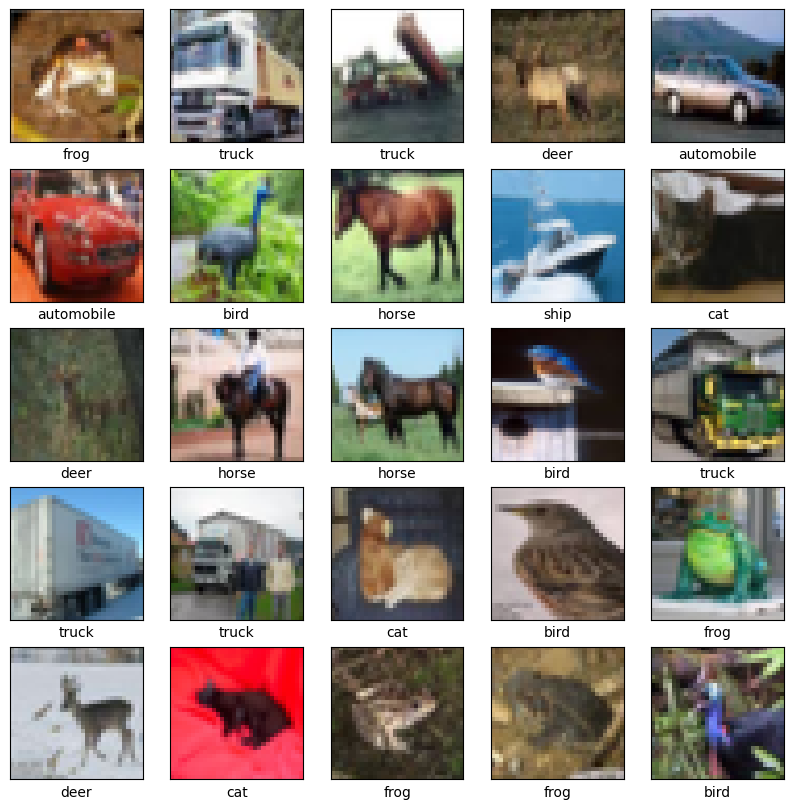

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# Step 1: Importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Step 2: Loading and pre-processing of the CIFAR-10 dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Step 3: Normalising pixel values to be between 0 and 1.
train_images = train_images/255.0
test_images = test_images/255.0

# Step 4: Defining the class names for CIFAR-10 images.
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Step 5: Visulaising a few training images from the CIFAR-10 dataset.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_name[train_labels[i][0]])
plt.show()

# Step 6: Building the CNN model (customised model).
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Step 7: Printing the model summary.
model.summary()

# Step 8: Compiling the CNN model.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )


In [ ]:
# Step 9: Training the CNN model.
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Step 10: Evaluating the performance of the CNN model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n Test accuracy is: {test_acc}')


Epoch 1/10
1563/1563 [==============================] - 18s 10ms/step - loss: 1.4923 - accuracy: 0.4606 - val_loss: 1.2546 - val_accuracy: 0.5524
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1331 - accuracy: 0.5989 - val_loss: 1.0749 - val_accuracy: 0.6217
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9829 - accuracy: 0.6548 - val_loss: 1.0262 - val_accuracy: 0.6371
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8952 - accuracy: 0.6854 - val_loss: 0.9374 - val_accuracy: 0.6725
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8205 - accuracy: 0.7129 - val_loss: 0.9050 - val_accuracy: 0.6771
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7616 - accuracy: 0.7337 - val_loss: 0.8899 - val_accuracy: 0.6943
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7117 - accuracy: 0.7514 - val_loss: 0.8900 - val_accurac

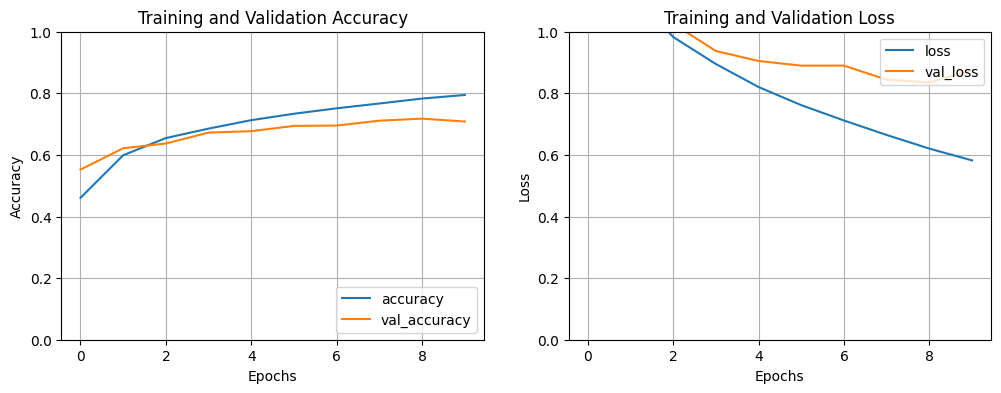

In [ ]:
# Step 11: Plotting the training and validation accuracy and loss values.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()